In [18]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import gmsh
import cv2
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import seaborn as sns

In [19]:
# Setting Matplotlib plotting defaults
# Font
mpl.rcParams['font.family']           ='Serif'    # Setting Font family
mpl.rcParams['font.size']             = 18        # Setting Font size
# Figure
mpl.rcParams["figure.figsize"]        = (11, 7)   # Setting Figure size
mpl.rcParams['savefig.dpi']           = 300       # Setting plot quality
# Legend
mpl.rcParams["legend.fontsize"]       = 15        # Legend fontsize
mpl.rcParams["legend.title_fontsize"] = 15        # Legend fontsize
# Grid
mpl.rcParams["axes.grid"]             = True      # Setting grid to display
mpl.rcParams["grid.color"]            ='black'    # Setting grid color
mpl.rcParams['grid.linestyle']        ='dotted'   # Setting grid linestyle
mpl.rcParams['grid.linewidth']        = 0.3       # Setting grid linewidth
# xticks
mpl.rcParams["xtick.minor.visible"]   = True      # Setting visibility of xticks
mpl.rcParams['xtick.minor.width']     = 1.0       # Setting width of minor xticks
mpl.rcParams['xtick.major.width']     = 1.0       # Setting width of major xticks
mpl.rcParams['xtick.direction']       ='inout'    # Setting directions of xticks
mpl.rcParams['xtick.minor.size']      = 5         # Setting size of minor xticks
mpl.rcParams['xtick.major.size']      = 8         # Setting size of major xticks
mpl.rcParams['xtick.top']             = True      # Setting visibility of top minor xticks
# yticks
mpl.rcParams["ytick.minor.visible"]   = True      # Setting visibility of yticks
mpl.rcParams['ytick.minor.width']     = 1.0       # Setting width of minor yticks
mpl.rcParams['ytick.major.width']     = 1.0       # Setting width of major xticks
mpl.rcParams['ytick.direction']       ='inout'    # Setting directions of yticks
mpl.rcParams['ytick.minor.size']      = 5         # Setting size of minor xticks
mpl.rcParams['ytick.major.size']      = 8         # Setting size of major xticks
mpl.rcParams['ytick.right']           = True      # Setting visibility of top minor xticks

In [21]:
datadf = pd.read_excel('raw_data_file.xlsx', sheet_name='raw_data')

In [ ]:
data = datadf[datadf[datadf.columns[1]] == 'fulfilled']

In [ ]:
weeks = data[data.columns[10]].dt.isocalendar().week
salesWeekWise = data.groupby(weeks)['Lineitem price'].sum()
months = data[data.columns[10]].dt.month
salesMonthWise = data.groupby(months)['Lineitem price'].sum()

In [ ]:
weeksNumbers = weeks.unique()
monthNumbers = months.unique()

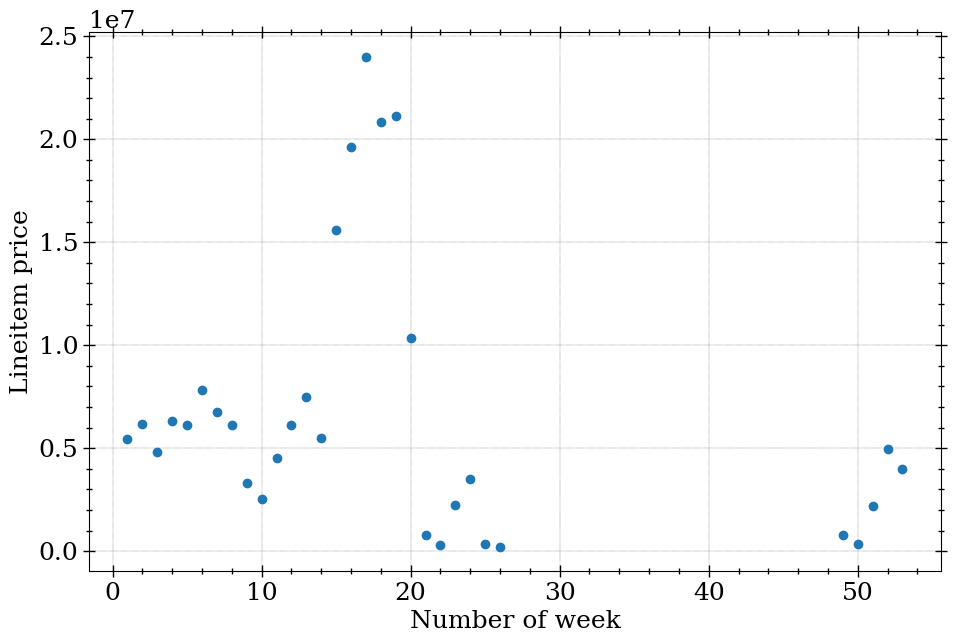

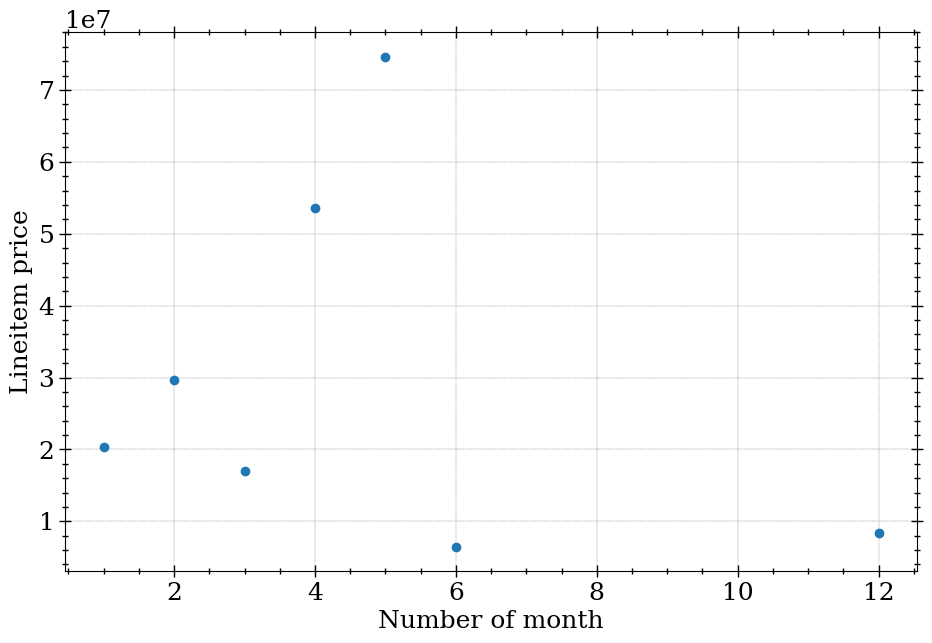

In [ ]:
plt.xlabel('Number of week')
plt.ylabel('Lineitem price')
plt.plot(weeksNumbers,salesWeekWise,'o')
plt.show()
plt.xlabel('Number of month')
plt.ylabel('Lineitem price')
plt.plot(monthNumbers,salesMonthWise,'o')
plt.show()


In [ ]:
weeks = data[data.columns[10]].dt.isocalendar().week
salesWeekWise = data.groupby(weeks)['Lineitem price'].sum()
months = data[data.columns[10]].dt.month
salesMonthWise = data.groupby(months)['Lineitem price'].sum()

### Observations:
1. **Spikes in Lineitem Price**:
   - Significant spikes observed, particularly between **Week 7–10** and **Week 15–20**.

2. **Drops in Lineitem Price**:
   - Several weeks exhibit very low or near-zero revenue, especially around **Weeks 20–30**.

3. **Periodic Trends**:
   - Peaks and troughs repeat at regular intervals, indicating potential **cyclical patterns** (e.g., seasonality, events, or campaigns).

---

### Analysis of the First 10 Weeks:
The first 10 weeks demonstrate higher sales volumes, likely due to the following factors:

#### **Seasonal Factors**:
- **Winter Season (Northern Hemisphere)**:
  - High demand for winter clothing like jackets, sweaters, and thermals due to cold weather.
  - Clearance sales of winter collections in preparation for spring inventory.

#### **Festive Period**:
- **New Year Festivities**:
  - Increased purchases for celebrations and gatherings.
  - Retailers offering discounts and sales to capitalize on the holiday season.

#### **Economic Reasons**:
- **End-of-Financial-Year Sales**:
  - Retailers may boost supply to meet sales targets before the fiscal year-end (varies by region).

---

### May Surge Analysis:
May exhibits a sudden surge in sales, potentially due to:

#### **Spring/Summer Season**:
- Transition to lighter fabrics, bright colors, and summer wear.
- Launch of spring/summer collections by fashion brands.


## City-Specific Insights

In [ ]:
cities = data[data.columns[-7]].astype(str).str.lower()
cities = cities.str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
cities = cities.str.replace(' ', '') 
cities = cities.str.lower()
cities = cities.replace('bengaluru','bangalore')
city,cnts= np.unique(cities,return_counts=True)
sortedcnts = np.argsort(cnts)[::-1]

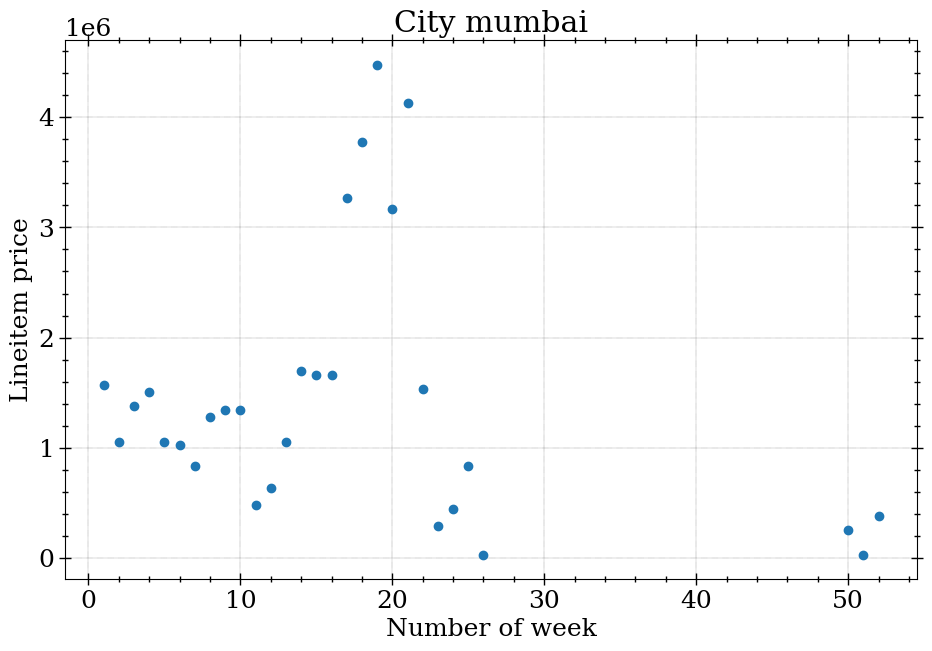

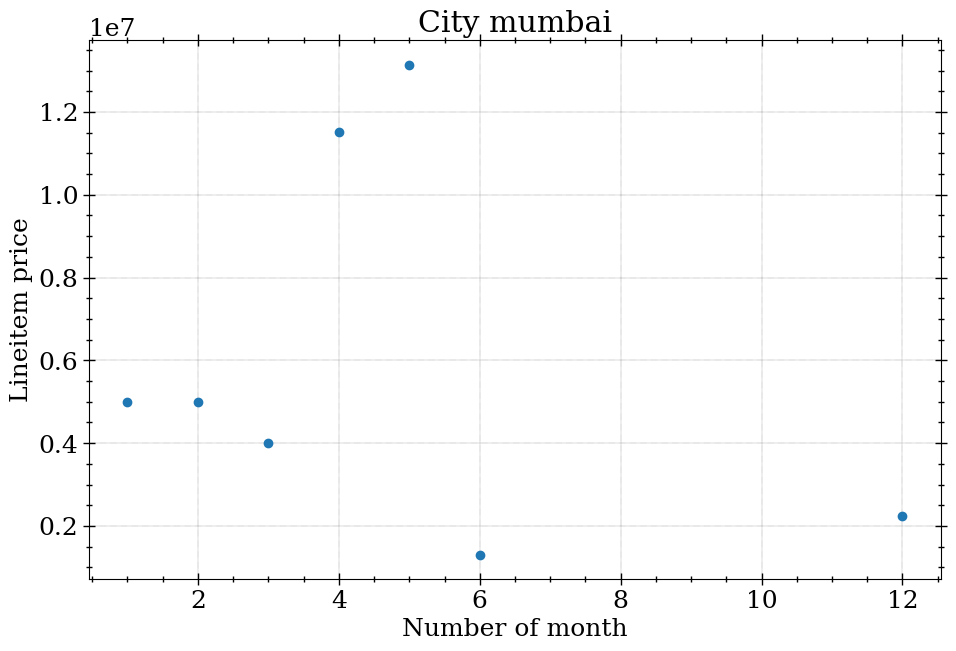

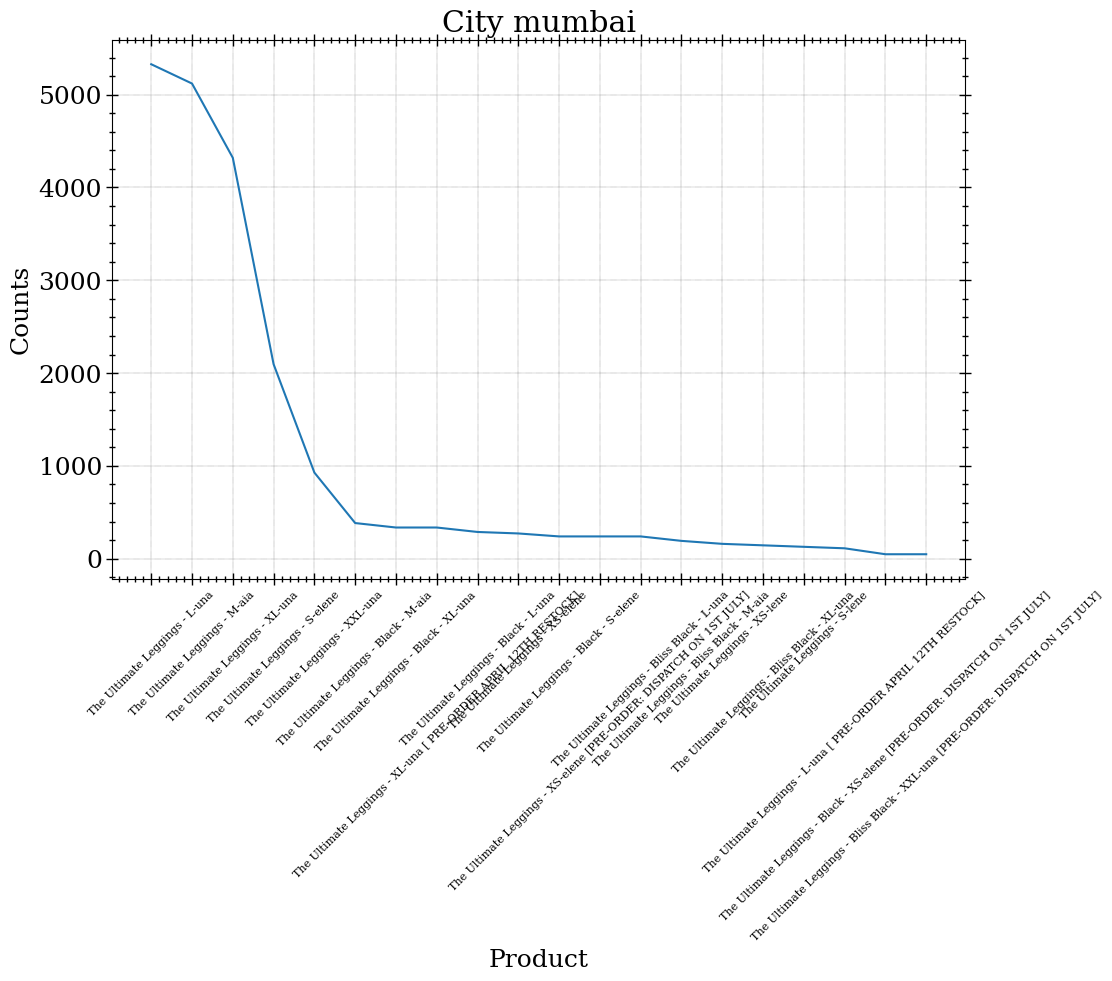

C:\Users\anike\AppData\Local\Temp\ipykernel_9780\3556128070.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week


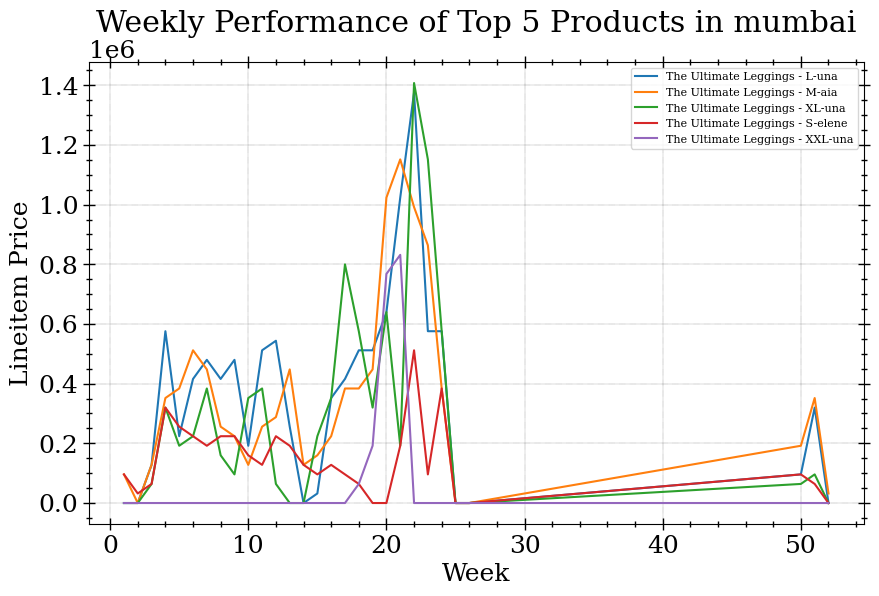

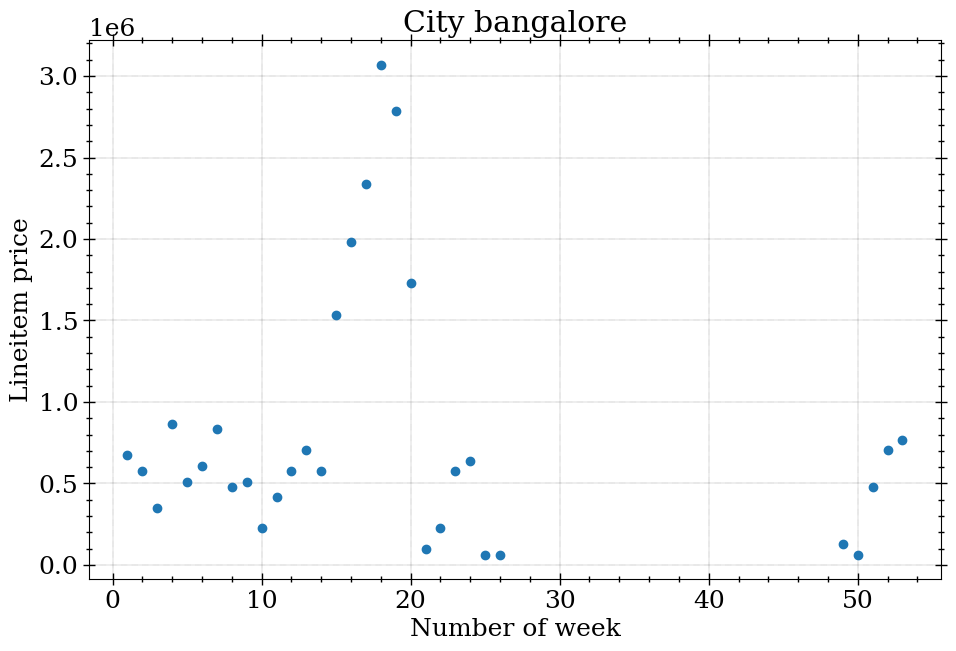

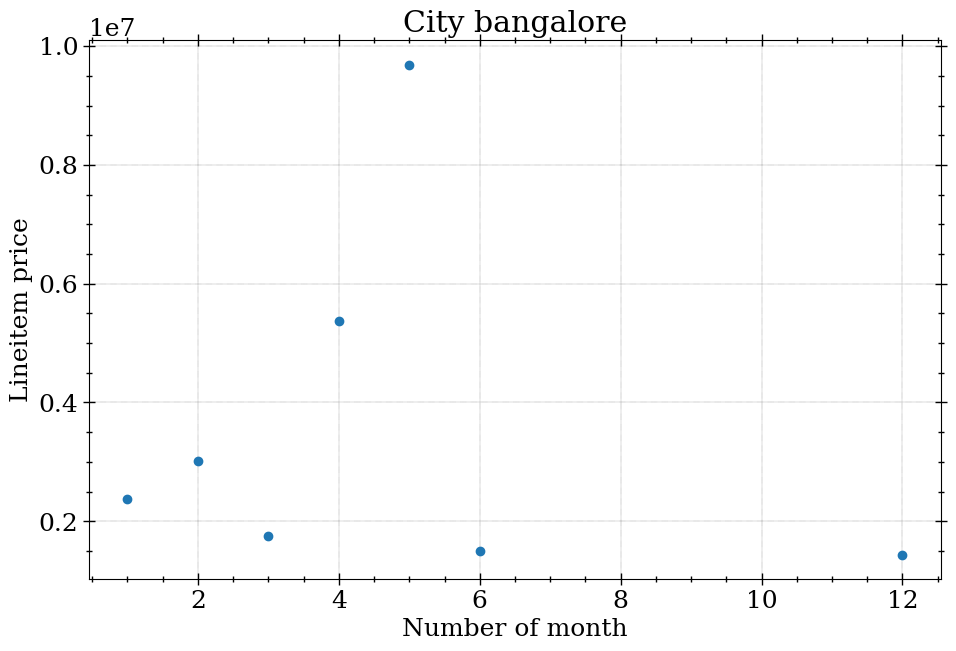

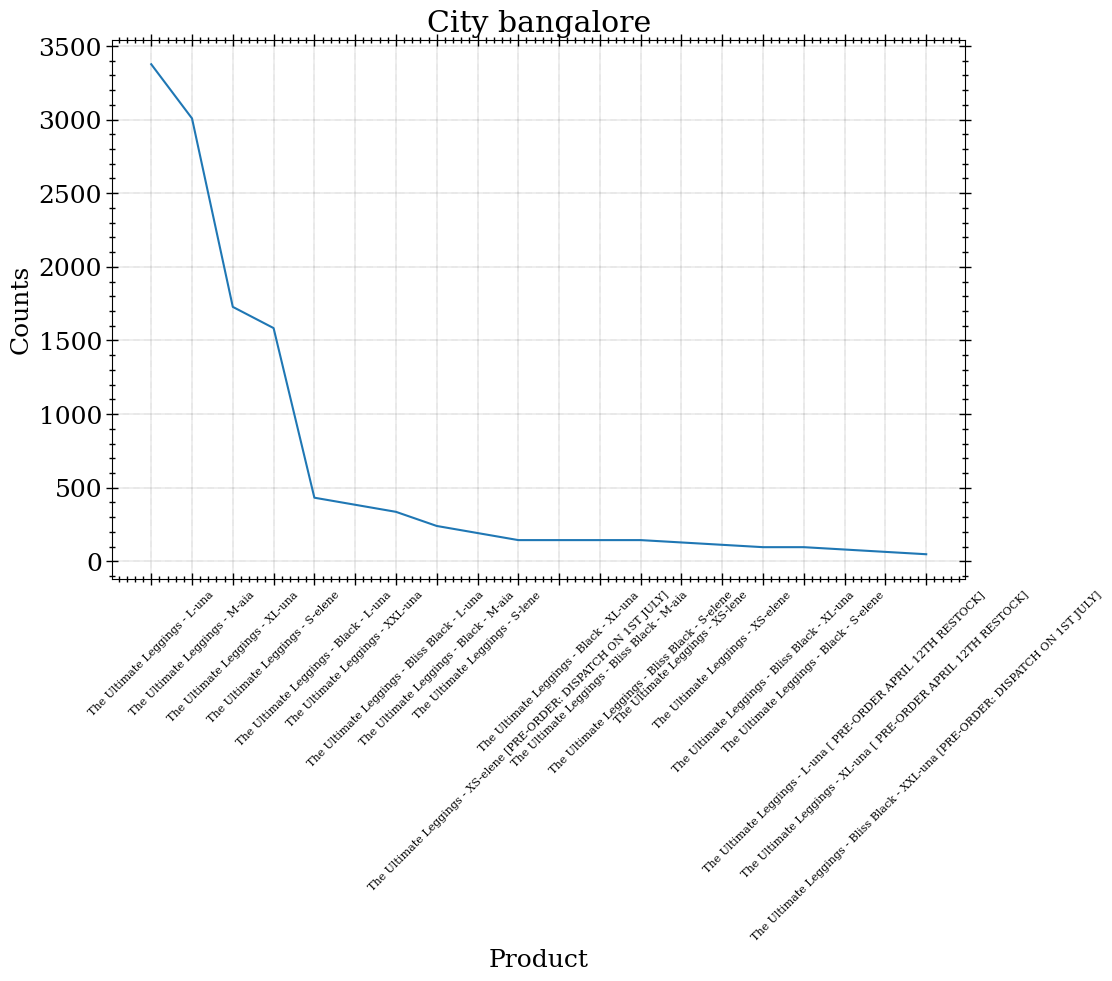

C:\Users\anike\AppData\Local\Temp\ipykernel_9780\3556128070.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week


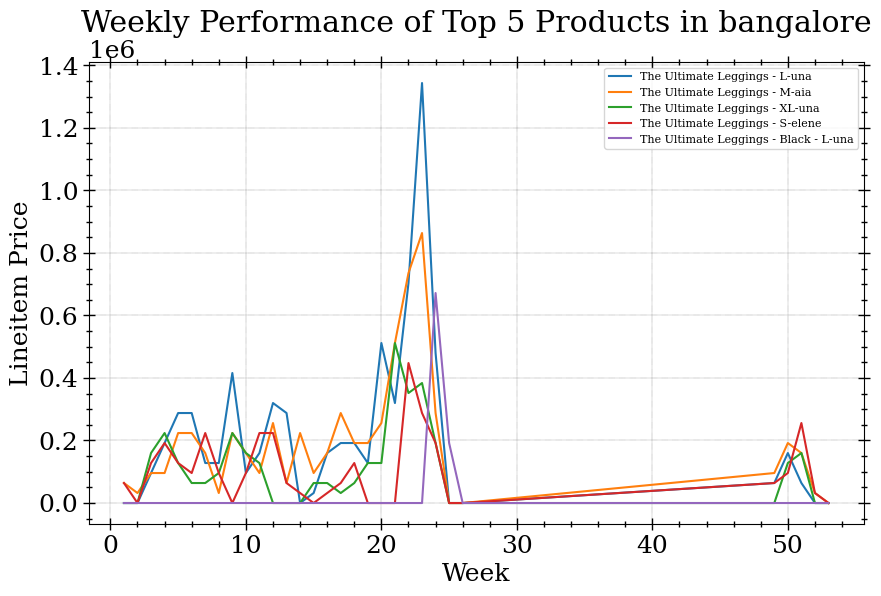

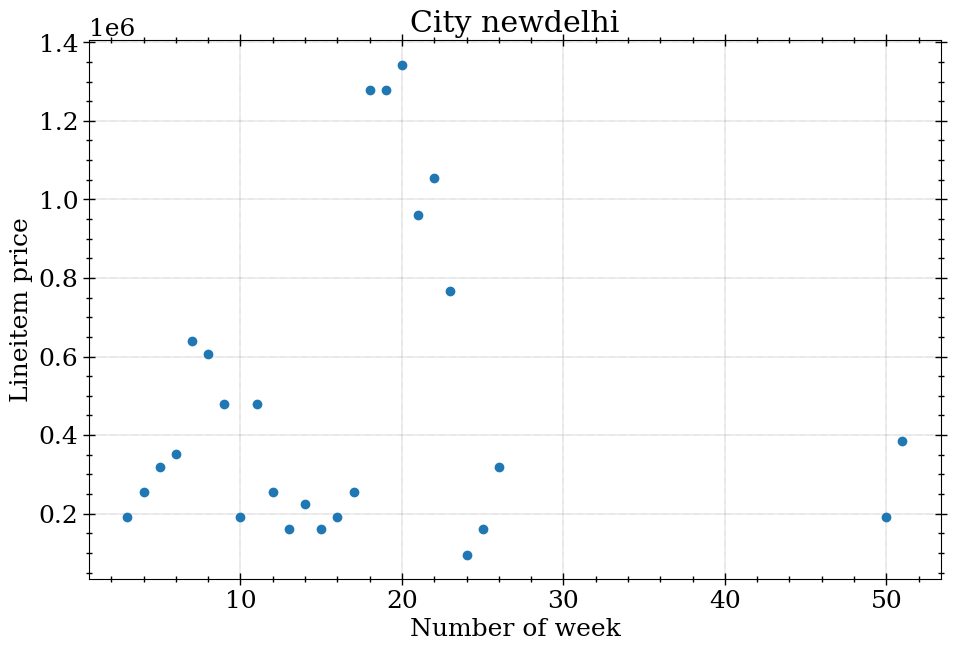

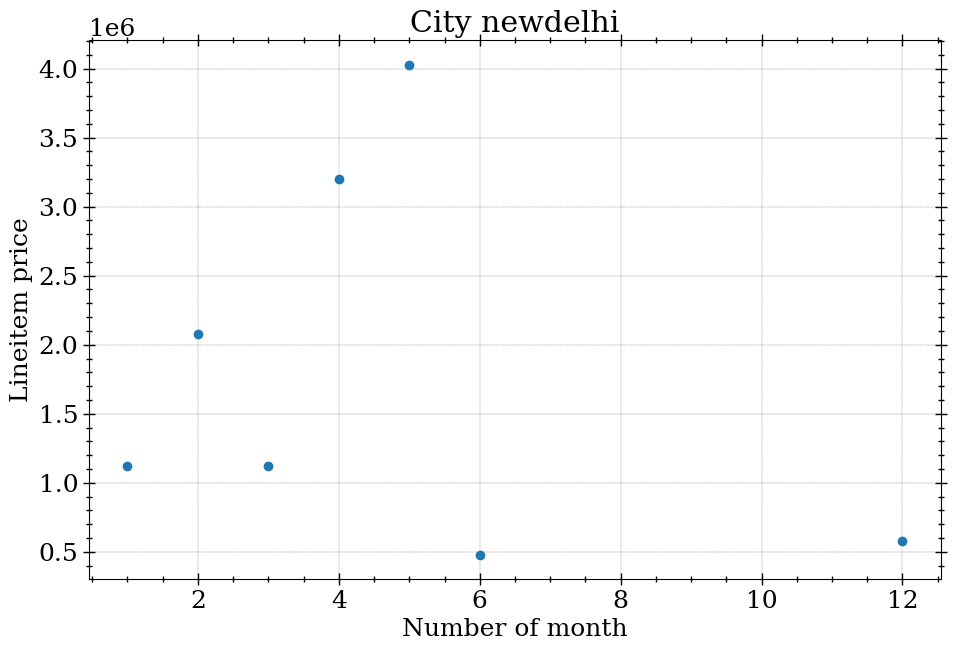

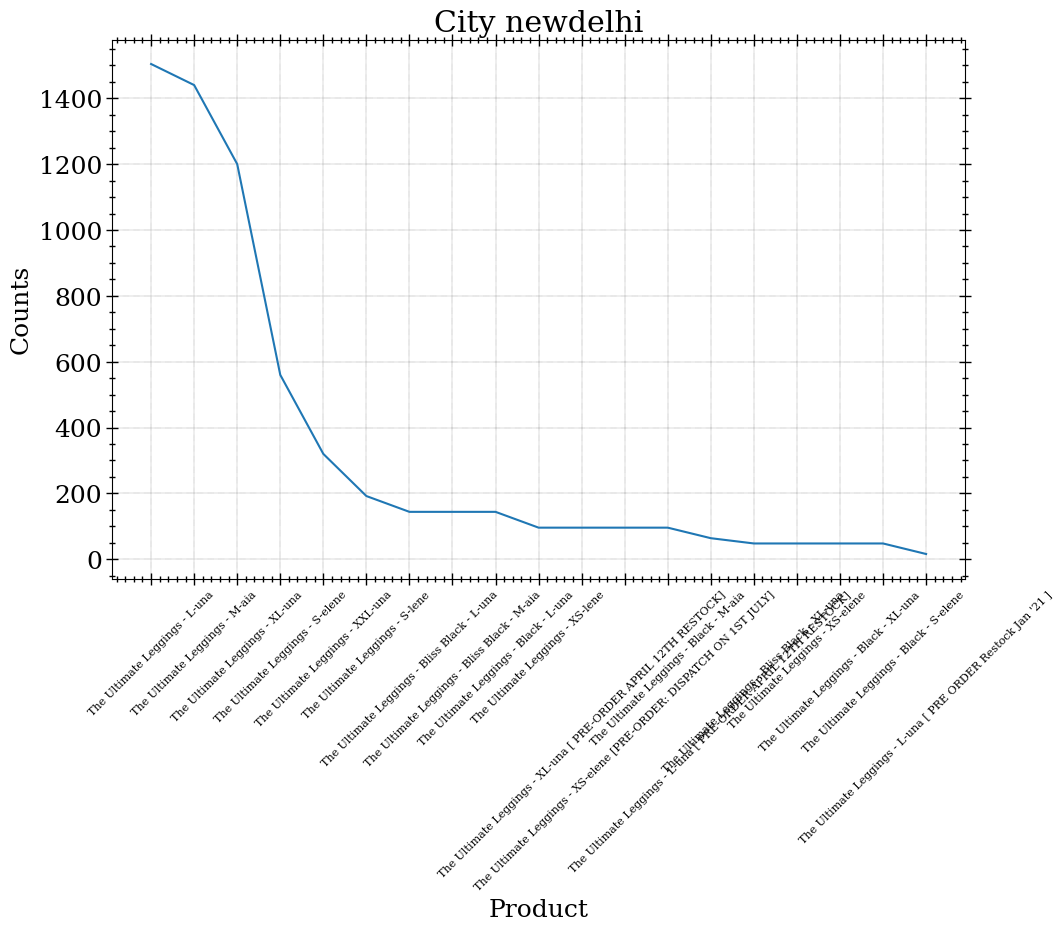

C:\Users\anike\AppData\Local\Temp\ipykernel_9780\3556128070.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week


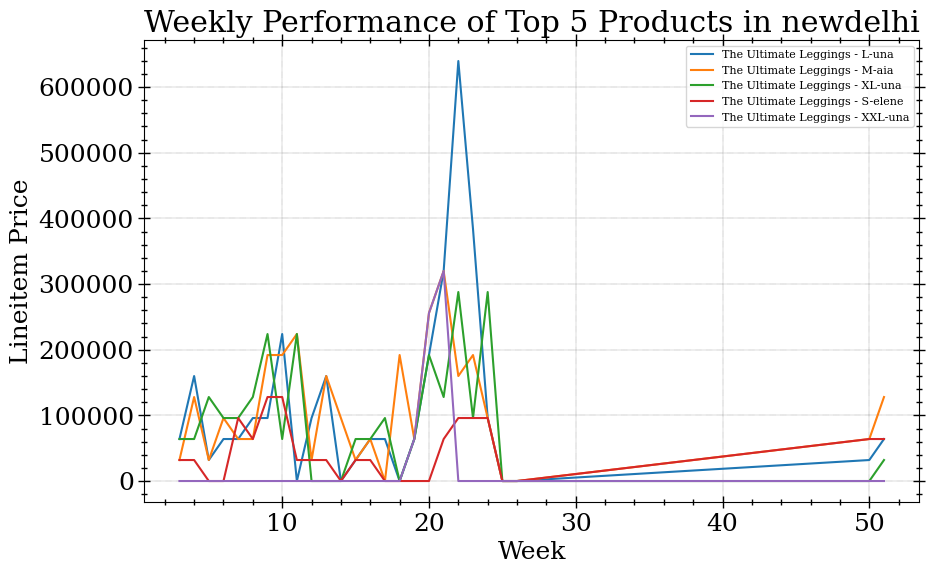

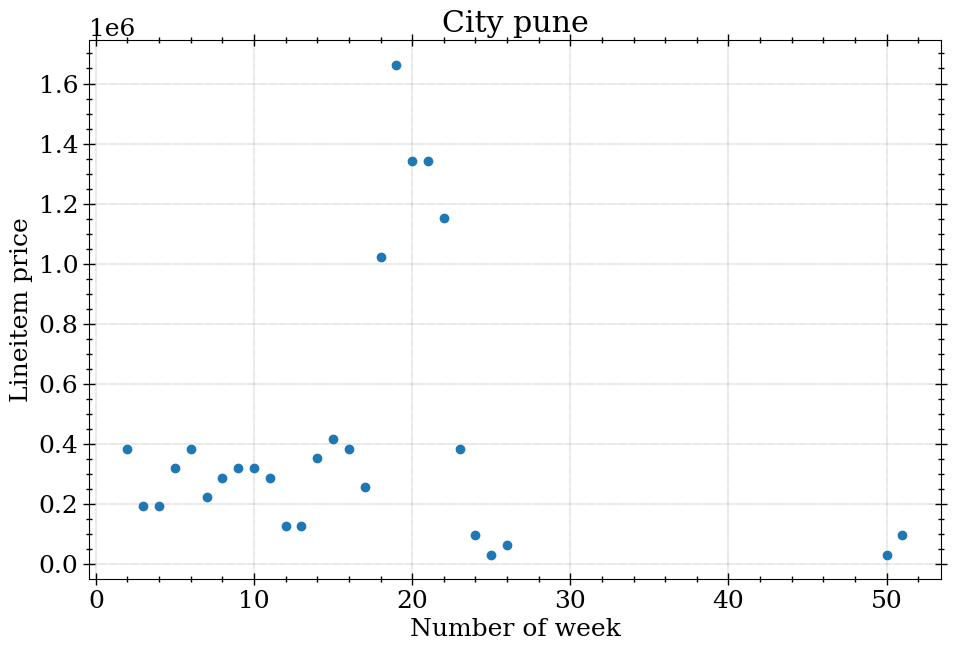

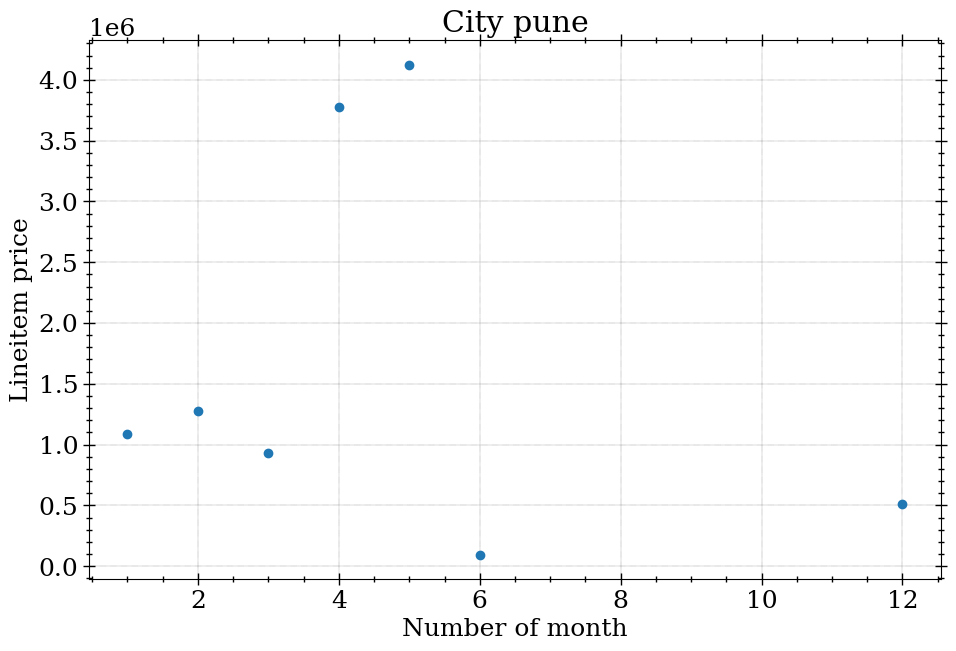

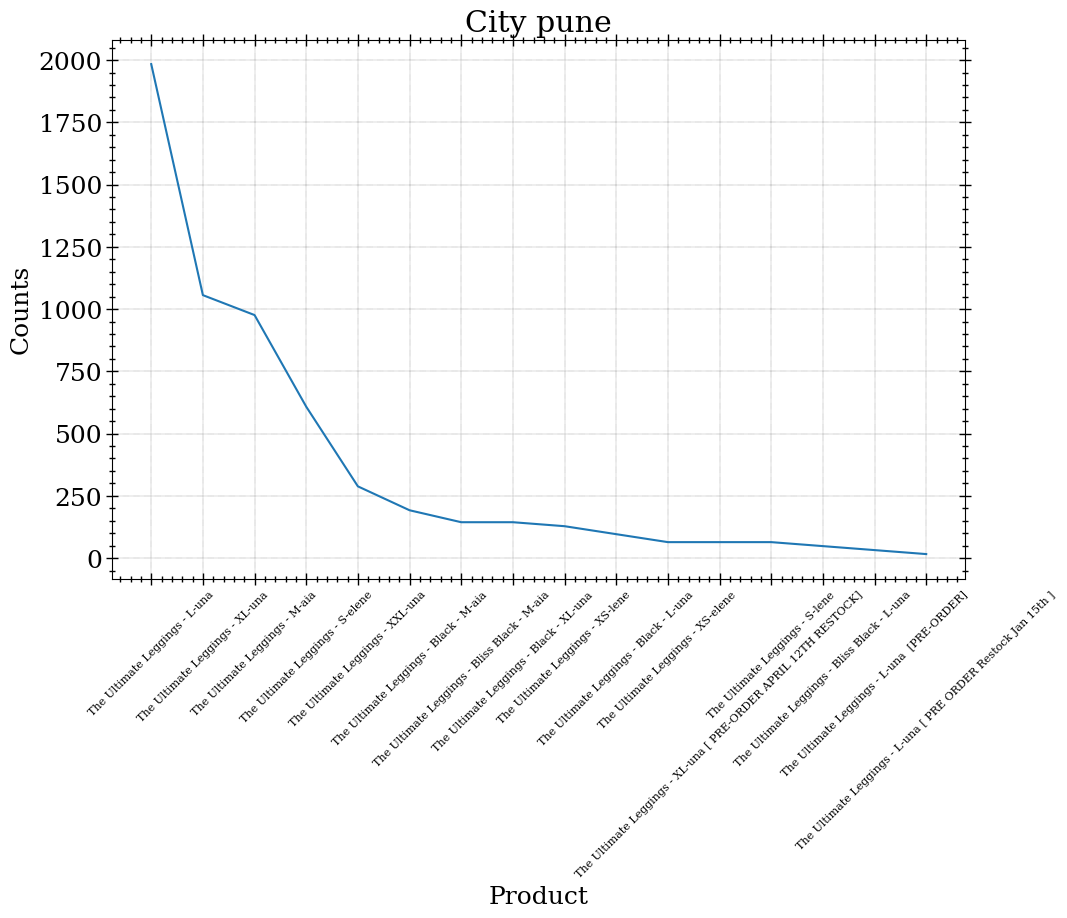

C:\Users\anike\AppData\Local\Temp\ipykernel_9780\3556128070.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week


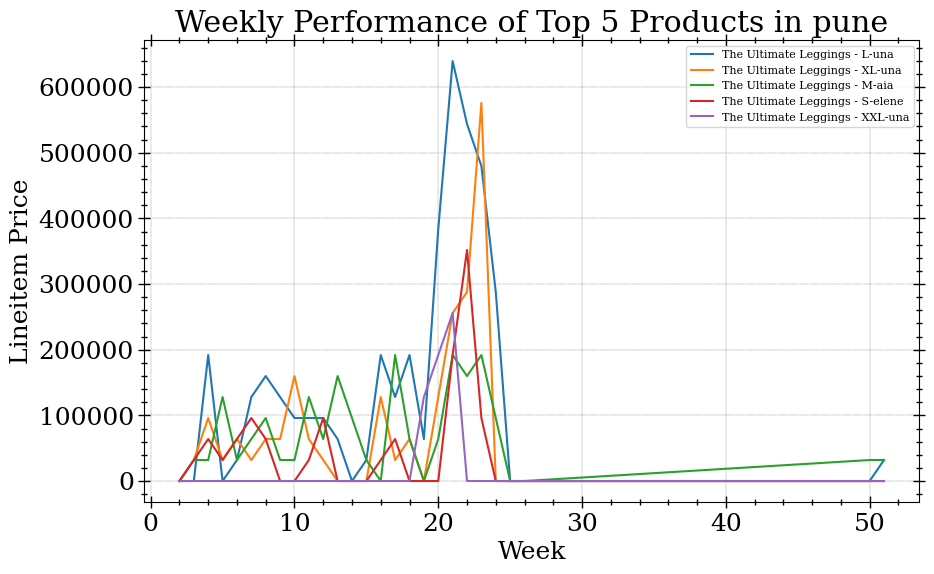

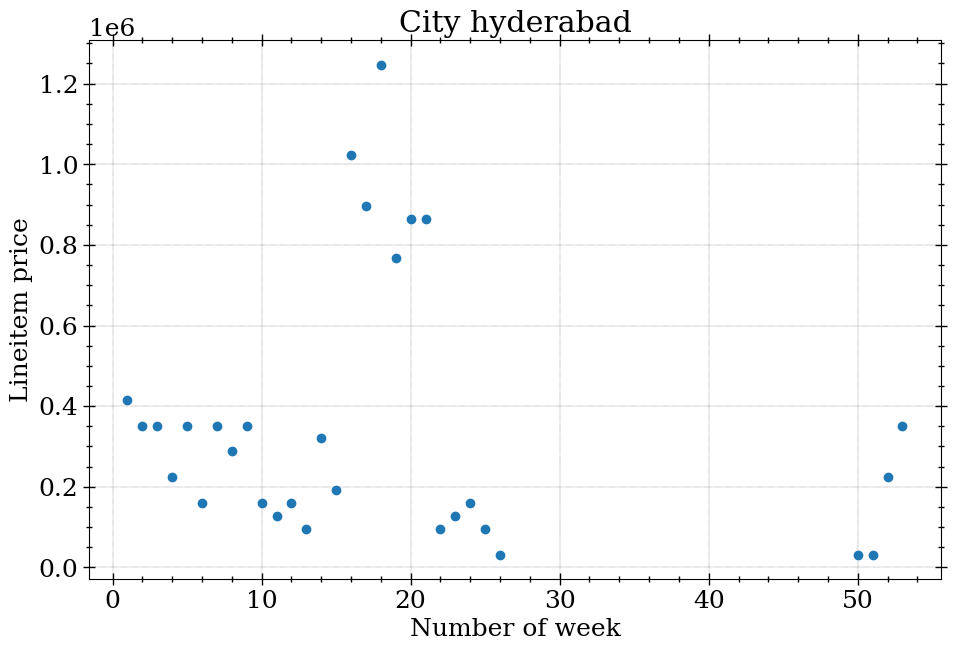

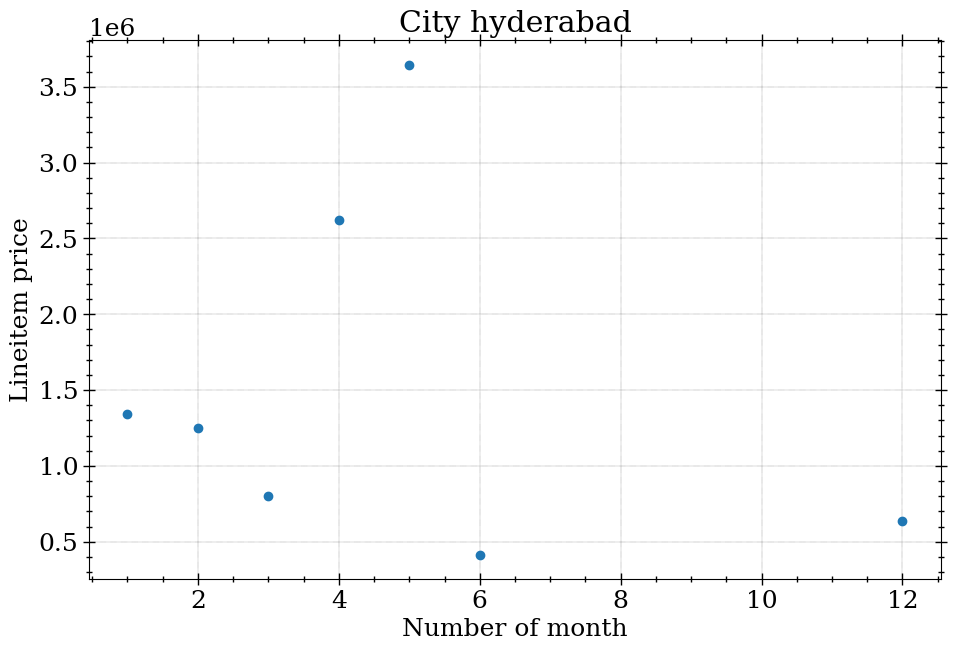

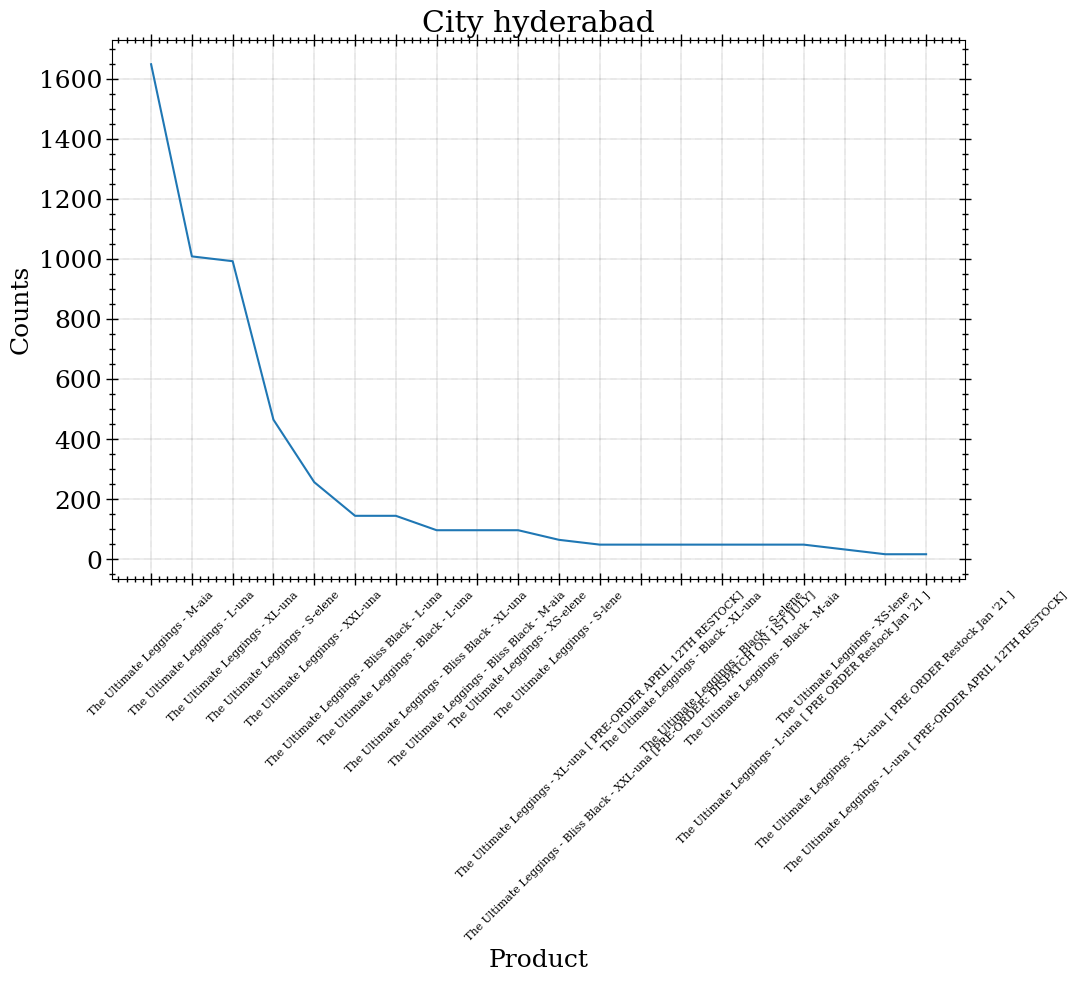

C:\Users\anike\AppData\Local\Temp\ipykernel_9780\3556128070.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week


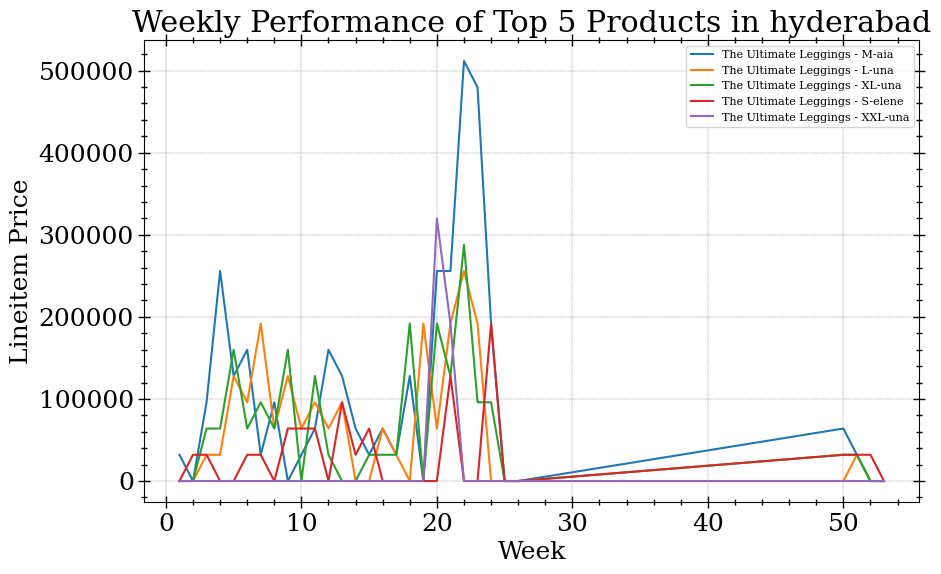

In [ ]:
k = 5
topKproducts = 20
topKproductsForAnalysis = 5
topKcities = city[sortedcnts[:k]]
monthsDataForKCities = []
weeksDataForKCities = []
weeklyPerformance = {}
for ithcity in topKcities:
    dataKthCity = data[cities == ithcity]
    prod,count = np.unique(dataKthCity['Product'],return_counts=True)
    sortedcounts = np.argsort(count)[::-1]

    weeks = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week
    salesWeekWise = dataKthCity.groupby(weeks)['Lineitem price'].sum()
    months = dataKthCity[dataKthCity.columns[10]].dt.month
    salesMonthWise = dataKthCity.groupby(months)['Lineitem price'].sum()

    weeksNumbers = weeks.unique().to_numpy().astype(int)
    monthNumbers = months.unique()

    weeksData = np.zeros(53)
    monthsData = np.zeros(12)
    weeksData[weeksNumbers-1] += salesWeekWise
    monthsData[monthNumbers-1] += salesMonthWise
    weeksDataForKCities.append(weeksData)
    monthsDataForKCities.append(monthsData)

    plt.xlabel('Number of week')
    plt.ylabel('Lineitem price')
    plt.title(f'City {ithcity}')
    plt.plot(weeksNumbers,salesWeekWise,'o')
    plt.show()
    plt.xlabel('Number of month')
    plt.ylabel('Lineitem price')
    plt.title(f'City {ithcity}')
    plt.plot(monthNumbers,salesMonthWise,'o')
    plt.show()

    plt.xlabel('Product')
    plt.ylabel('Counts')
    plt.title(f'City {ithcity}')
    plt.plot(prod[sortedcounts[:topKproducts]],count[sortedcounts[:topKproducts]])
    plt.xticks(rotation=45, fontsize=8)  # Set font size to 
    plt.show()

    #ChatGPT
    dataKthCity['Week'] = dataKthCity[dataKthCity.columns[10]].dt.isocalendar().week
    weeklyProductSales = dataKthCity.groupby(['Week', 'Product'])['Lineitem price'].sum().unstack(fill_value=0)

    # Keep only the topK products
    prod, count = np.unique(dataKthCity['Product'], return_counts=True)
    sortedcounts = np.argsort(count)[::-1]
    topProducts = prod[sortedcounts[:topKproductsForAnalysis]]
    weeklyProductSalesTop = weeklyProductSales[topProducts]

    # Add to dictionary for further analysis
    weeklyPerformance[ithcity] = weeklyProductSalesTop

    # Plot weekly performance for each top product
    plt.figure(figsize=(10, 6))
    plt.title(f"Weekly Performance of Top {topKproductsForAnalysis} Products in {ithcity}")
    for product in topProducts:
        if product in weeklyProductSalesTop.columns:
            plt.plot(weeklyProductSalesTop.index, weeklyProductSalesTop[product], label=product)
    plt.xlabel("Week")
    plt.ylabel("Lineitem Price")
    plt.legend(fontsize=8)
    plt.show()


### Mumbai:
- **Best-sellers**: "The Ultimate Leggings - Luna" leads sales.
- **Sizes**: Larger sizes (XL, XXL) perform better than smaller ones, indicating a strong preference for plus-size products.
- **Colors**: Luna (likely a neutral or popular shade) dominates, followed by Black.
- **Revenue Implications**: 
  - Focus on stocking larger sizes in Luna and Black colors.
  - Given the high volume, premium pricing could maximize revenue without impacting demand.

---

### Bangalore:
- **Best-sellers**: Similar trends to Mumbai; "The Ultimate Leggings - Luna" is the top seller.
- **Sizes**: Medium and XL sizes have higher sales volumes.
- **Colors**: Black and Luna are consistently popular.
- **Revenue Implications**: 
  - Bangalore shows a slightly more even distribution across sizes. 
  - Consider offering size-specific promotions and bundles to encourage cross-sales.
  - Luna’s dominance suggests it should remain a priority, but additional shades could be tested for diversification.

---

### New Delhi:
- **Best-sellers**: "The Ultimate Leggings - Luna" again leads but has fewer overall sales compared to Mumbai and Bangalore.
- **Sizes**: Medium and Large sizes are preferred.
- **Colors**: Luna remains dominant, with Black as a secondary choice.
- **Revenue Implications**:
  - New Delhi shows more moderate demand.
  - Focus on mid-tier sizes and standard colors to maintain cost efficiency in inventory management.

---

### Pune:
- **Best-sellers**: "The Ultimate Leggings - Luna" leads significantly, with a sharp decline in demand for other products.
- **Sizes**: Medium and Large dominate the sales.
- **Colors**: Luna continues to be a hit.
- **Revenue Implications**:
  - Focus on consolidating inventory around high-performing SKUs like Luna in Medium and Large sizes.
  - Promotions for secondary products might help reduce inventory waste.

---

### Hyderabad:
- **Best-sellers**: "The Ultimate Leggings - Luna" is the top product, but overall demand is lower compared to Mumbai and Bangalore.
- **Sizes**: Medium sizes are leading, followed by XL.
- **Colors**: Luna and Black are key.
- **Revenue Implications**:
  - Hyderabad shows a conservative buying trend but has growth potential.
  - Focus on standard sizes and colors while introducing limited-time offers to stimulate demand.

---

## General Observations Across Cities

### Colors:
- **Luna**: Consistently the best-selling color, indicating universal appeal.
- **Black**: A strong second.
- Experimenting with additional shades (e.g., neutrals or trendy colors) could unlock incremental sales.

### Sizes:
- Larger sizes (XL, XXL) perform well in cities like **Mumbai**, highlighting inclusivity as a key driver of sales.
- Medium sizes are more popular in **Bangalore**, **New Delhi**, and **Hyderabad**.
- Focus on regional size preferences to optimize inventory.

### Revenue Optimization:
- **Premium-priced products** like "The Ultimate Leggings - Luna" are driving sales.
  - Extending this line with seasonal designs (e.g., patterns, limited editions) can boost revenue.
- **Bundles**: Offering Luna in different sizes or colors may increase average order value.
- Invest in **targeted advertising** highlighting inclusivity in sizing and the versatility of Luna to appeal to diverse customers.

### Restocking Strategy:
- Luna and Black are consistently high performers. Ensure steady stock for these SKUs across all major cities.
- Discontinue or heavily discount slow-moving colors or sizes to free up working capital.

### Localized Insights:
- **Mumbai** and **Bangalore**: Show potential for premium offerings due to higher volumes.
- **Pune** and **Hyderabad**: May respond better to value-driven pricing strategies and discounts.


## Correlation Analysis

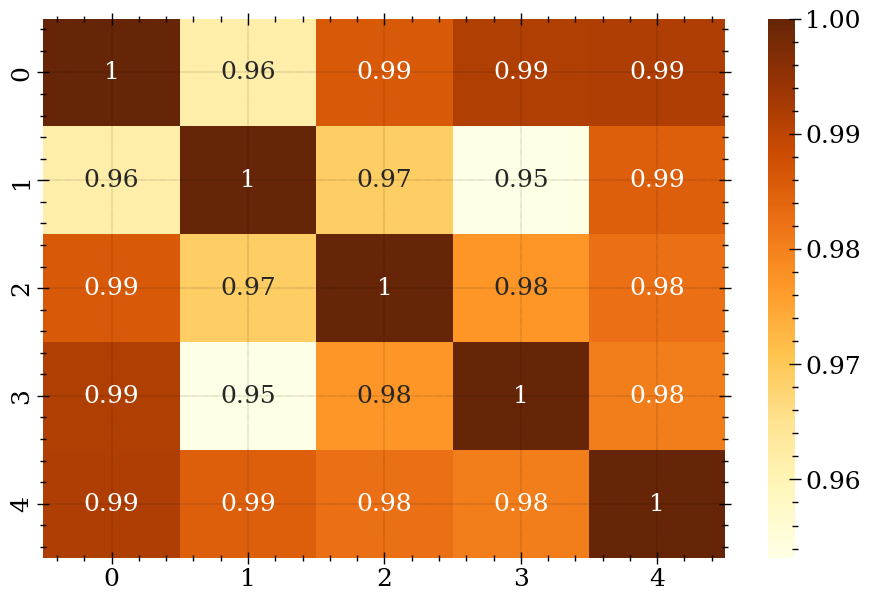

In [ ]:
matrix = pd.DataFrame(monthsDataForKCities)
sns.color_palette("YlOrBr", as_cmap=True)
ax = sns.heatmap(matrix.T.corr(), annot=True,cmap="YlOrBr")

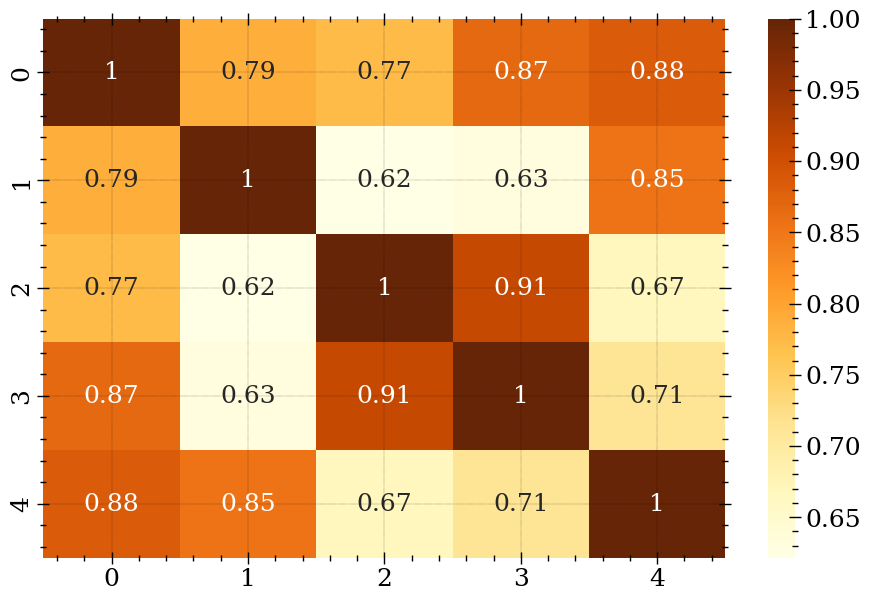

In [ ]:
matrix = pd.DataFrame(weeksDataForKCities)
sns.color_palette("YlOrBr", as_cmap=True)
ax = sns.heatmap(matrix.T.corr(), annot=True,cmap="YlOrBr")

### First Correlation Map (Monthly Sales)
- The first heatmap (monthly sales) shows **very high correlations** (mostly above 0.95).
- This indicates that the cities' sales trends are **very similar on a month-to-month basis**.
- **Key Insight**:
  - High correlations suggest that **external factors** (e.g., economic conditions, seasonal demand) influence all cities similarly over longer time frames.
  - Monthly data smooths out weekly fluctuations, which likely explains the consistently high correlation values.

---

### Second Correlation Map (Weekly Sales)
- The second heatmap (weekly sales) shows **lower correlations** (ranging from 0.62 to 0.91), meaning weekly sales patterns differ more significantly between cities.
- **Key Insight**:
  - Weekly data captures **short-term variability**, such as local events, promotions, or city-specific trends, leading to lower correlations.
  - Some city pairs still exhibit **moderate-to-high correlations** (e.g., 0.87, 0.88), possibly due to **regional similarities**


## Bonus

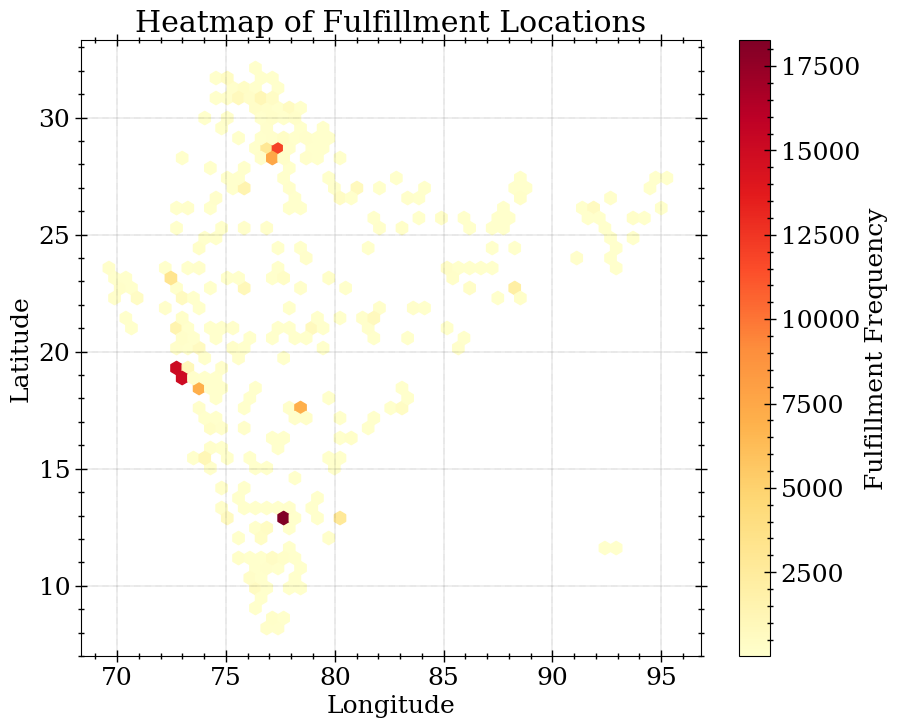

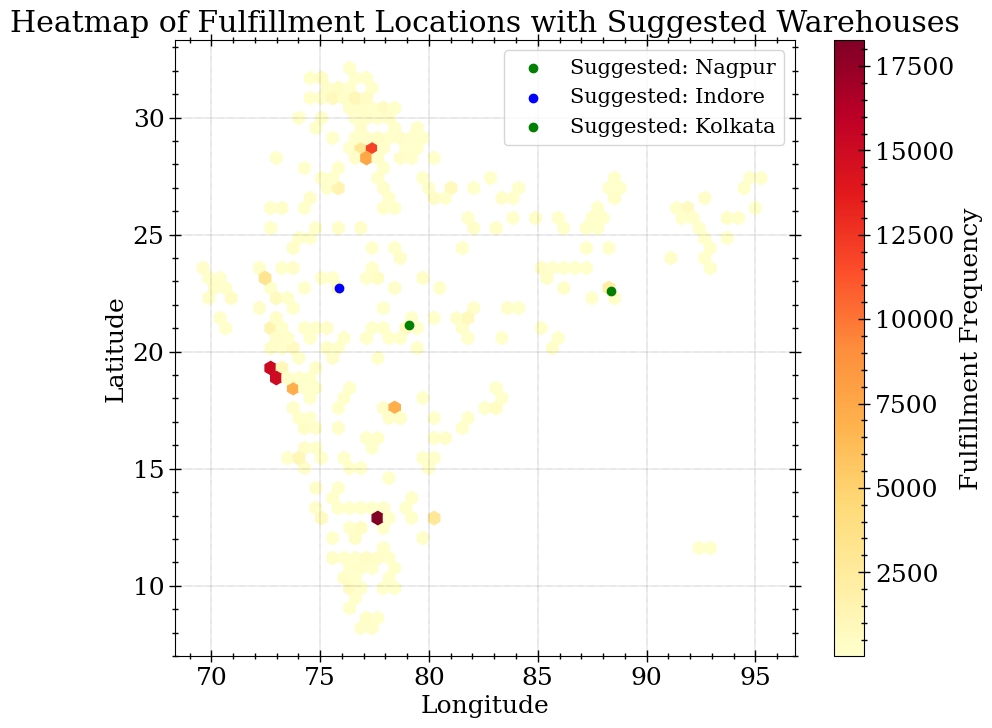

In [30]:
file_path = 'raw_data_file.xlsx'
sheet1 = pd.read_excel(file_path, sheet_name='raw_data', dtype=str)
sheet2 = pd.read_excel(file_path, sheet_name='Lat_long(for ref)', dtype=str)

sheet1['Billing Zip'] = sheet1['Billing Zip'].str.replace("'", "")

merged_data = pd.merge(sheet1, sheet2, left_on='Billing Zip', right_on='Pin code', how='inner')

cleaned_data = merged_data.dropna(subset=['Lat', 'Long'])

cleaned_data['Lat'] = cleaned_data['Lat'].astype(float)
cleaned_data['Long'] = cleaned_data['Long'].astype(float)

plt.figure(figsize=(10, 8))
plt.hexbin(cleaned_data['Long'], cleaned_data['Lat'], gridsize=50, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Fulfillment Frequency')
plt.title('Heatmap of Fulfillment Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Suggested locations for new warehouses
suggested_locations = [
    {'city': 'Nagpur', 'lat': 21.1458, 'long': 79.0882, 'color': 'green'},
    {'city': 'Indore', 'lat': 22.7196, 'long': 75.8577, 'color': 'blue'},
    {'city': 'Kolkata', 'lat': 22.5726, 'long': 88.3639, 'color': 'green'}
]

# Plot heatmap with suggested locations
plt.figure(figsize=(10, 8))
plt.hexbin(cleaned_data['Long'], cleaned_data['Lat'], gridsize=50, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Fulfillment Frequency')

# Mark suggested warehouse locations
for location in suggested_locations:
    plt.scatter(location['long'], location['lat'], color=location['color'], label=f"Suggested: {location['city']}")

plt.title('Heatmap of Fulfillment Locations with Suggested Warehouses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

### Inferences from the Heatmap

#### High Fulfillment Zones:
- The densest fulfillment activity is concentrated around major metropolitan areas such as **Bangalore**, **Delhi**, and **Mumbai**.
- These areas show the highest frequency of fulfillment, indicating a large customer base.

#### Potential Areas for a New Warehouse:
1. **Central India** (e.g., areas near **Nagpur** or **Indore**):
   - These regions can serve as a strategic hub to cater to both northern and southern states effectively.
2. **Eastern India** (e.g., **Kolkata**):
   - This area shows moderate activity and could benefit from reduced shipping times if a warehouse is placed nearby.

#### Logistical Advantages:
- Placing a warehouse near central regions would optimize coverage for both high and medium-demand zones.
- Establishing fulfillment centers closer to dense areas (as identified in the heatmap) would reduce delivery times and operational costs.

These insights can guide the placement of new warehouses to enhance efficiency and customer satisfaction.
